In [5]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [30]:
import re
import pandas as pd
from collections import Counter
import emoji


In [31]:
# Function to detect if line starts with date and time (Android)
def startsWithDateAndTimeAndroid(s):
    s = s.replace('\u202f', ' ')  # Normalize non-breaking spaces
    pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} (AM|PM|am|pm) - '
    return re.match(pattern, s) is not None

# Function to check if line contains an author
def findAuthor(s):
    return ':' in s

# Parse a line into (date, time, author, message)
def getDataPointAndroid(line):
    line = line.replace('\u202f', ' ')
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' - '.join(splitLine[1:])
    
    if findAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ': '.join(splitMessage[1:])
    else:
        author = None

    return date, time, author, message

# Emoji extractor
def split_count(text):
    emoji_list = []
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
    return emoji_list


In [32]:
parsedData = []
conversationPath = "WhatsApp Chat with NITIANS MCA'26.txt"  # Change if needed

with open(conversationPath, encoding="utf-8") as fp:
    first_line = fp.readline()
    print("First Line:", first_line)

    device = 'android'
    messageBuffer = []
    date, time, author = None, None, None

    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip().replace('\u202f', ' ')

        if startsWithDateAndTimeAndroid(line):
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

if len(messageBuffer) > 0:
    parsedData.append([date, time, author, ' '.join(messageBuffer)])


First Line: 30/08/2024, 12:50 am - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.



In [33]:
print(f"\nTotal messages parsed: {len(parsedData)}")
print("Device detected:", device)

if len(parsedData) == 0:
    print("❌ No messages found. Check your parsing logic.")
else:
    df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df = df.dropna()



Total messages parsed: 19
Device detected: android


C:\Users\Ayushi Agrawal\AppData\Local\Temp\ipykernel_15456\3367612258.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [34]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df["Message"].apply(lambda x: len(re.findall(URLPATTERN, x)))

df['emoji'] = df["Message"].apply(split_count)
df['emojicount'] = df['emoji'].str.len()


In [35]:
print("\n✅ Sample messages:")
display(df.head(20))



✅ Sample messages:


,Date,Time,Author,Message,urlcount,emoji,emojicount
5,2025-01-13,3:15 pm,+91 98341 89236,if anyone who knows someone who is in need of ...,0,[],0
6,2025-03-08,10:25 am,+91 76672 64372,Bhai no offense lekin tum sare nit Trichy wale...,0,[],0
8,2025-03-08,6:54 pm,+91 78170 71031,Context?,0,[],0
9,2025-05-11,10:31 pm,+91 62072 59544,<Media omitted>,0,[],0
10,2025-05-11,10:31 pm,+91 62072 59544,mere id se koi aapse paise ki demand kre to pl...,0,[],0
11,2025-05-11,10:41 pm,+91 82529 65226,I got the same message!,0,[],0
12,2025-05-11,10:41 pm,+91 62072 59544,Please avoid that message.,0,[],0
13,2025-05-11,10:42 pm,+91 62072 59544,And please if you have any solution then tell ...,0,[],0
14,2025-05-11,10:42 pm,+91 82529 65226,"Kk, mai report kr rha hun isss I'd pr!",0,[],0
15,2025-05-11,10:42 pm,+91 62072 59544,"Okay, guys everyone please report this id plz 🙏🏻",0,"[🙏, 🏻]",2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12 non-null     datetime64[ns]
 1   Time        12 non-null     object        
 2   Author      12 non-null     object        
 3   Message     12 non-null     object        
 4   urlcount    12 non-null     int64         
 5   emoji       12 non-null     object        
 6   emojicount  12 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 768.0+ bytes


In [37]:
df.Author.unique()

array(['+91 98341 89236', '+91 76672 64372', '+91 78170 71031',
       '+91 62072 59544', '+91 82529 65226', '+91 96443 95887'],
      dtype=object)

In [38]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12 non-null     datetime64[ns]
 1   Time        12 non-null     object        
 2   Author      12 non-null     object        
 3   Message     12 non-null     object        
 4   urlcount    12 non-null     int64         
 5   emoji       12 non-null     object        
 6   emojicount  12 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 768.0+ bytes


In [39]:
total_message=df.shape[0]
print(total_message)

12


In [40]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)


1


In [41]:
URLPATTERN = r'(https?://\S+)'

df['urlcount'] = df.Message.apply(lambda x: len(re.findall(URLPATTERN, x)))
links = np.sum(df.urlcount)
print(links)


1


In [42]:
link_messages = df[df['urlcount'] > 0]

deleted_messages = df[(df["Message"] == " You deleted this message") | 
                      (df["Message"] == " This message was deleted")]

media_messages_df = df[(df['Message'] == '<Media omitted>') | 
                       (df['Message'] == ' image omitted') | 
                       (df['Message'] == ' video omitted')]

messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)


In [44]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 5 to 17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10 non-null     datetime64[ns]
 1   Time        10 non-null     object        
 2   Author      10 non-null     object        
 3   Message     10 non-null     object        
 4   urlcount    10 non-null     int64         
 5   emoji       10 non-null     object        
 6   emojicount  10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 640.0+ bytes


In [45]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s: len(s))
messages_df['word_count'] = messages_df['Message'].apply(lambda s: len(s.split(' ')))
messages_df['MessageCount'] = 1


In [46]:
messages_df.head(10)


,Date,Time,Author,Message,urlcount,emoji,emojicount,Letter_Count,word_count,MessageCount
5,2025-01-13,3:15 pm,+91 98341 89236,if anyone who knows someone who is in need of ...,0,[],0,632,117,1
6,2025-03-08,10:25 am,+91 76672 64372,Bhai no offense lekin tum sare nit Trichy wale...,0,[],0,304,63,1
8,2025-03-08,6:54 pm,+91 78170 71031,Context?,0,[],0,8,1,1
10,2025-05-11,10:31 pm,+91 62072 59544,mere id se koi aapse paise ki demand kre to pl...,0,[],0,90,19,1
11,2025-05-11,10:41 pm,+91 82529 65226,I got the same message!,0,[],0,23,5,1
12,2025-05-11,10:41 pm,+91 62072 59544,Please avoid that message.,0,[],0,26,4,1
13,2025-05-11,10:42 pm,+91 62072 59544,And please if you have any solution then tell ...,0,[],0,50,11,1
14,2025-05-11,10:42 pm,+91 82529 65226,"Kk, mai report kr rha hun isss I'd pr!",0,[],0,38,9,1
15,2025-05-11,10:42 pm,+91 62072 59544,"Okay, guys everyone please report this id plz 🙏🏻",0,"[🙏, 🏻]",2,48,9,1
17,2025-05-12,1:16 am,+91 96443 95887,This message was deleted,0,[],0,24,4,1


In [47]:

frnds = messages_df.Author.unique()

for i in range(len(frnds)):
    req_df = messages_df[messages_df["Author"] == frnds[i]]

    print(f'Stats of {frnds[i]} -')
    print('Messages Sent:', req_df.shape[0])

    words_per_message = (np.sum(req_df['word_count'])) / req_df.shape[0]
    print('Words per message:', words_per_message)

    media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
    print('Media Messages Sent:', media)

    links = sum(link_messages[link_messages['Author'] == frnds[i]]['urlcount'])
    print('Links Sent:', links)
    
    print()


Stats of +91 98341 89236 -
Messages Sent: 1
Words per message: 117.0
Media Messages Sent: 0
Links Sent: 0

Stats of +91 76672 64372 -
Messages Sent: 1
Words per message: 63.0
Media Messages Sent: 0
Links Sent: 0

Stats of +91 78170 71031 -
Messages Sent: 1
Words per message: 1.0
Media Messages Sent: 0
Links Sent: 0

Stats of +91 62072 59544 -
Messages Sent: 4
Words per message: 10.75
Media Messages Sent: 1
Links Sent: 1

Stats of +91 82529 65226 -
Messages Sent: 2
Words per message: 7.0
Media Messages Sent: 0
Links Sent: 0

Stats of +91 96443 95887 -
Messages Sent: 1
Words per message: 4.0
Media Messages Sent: 0
Links Sent: 0



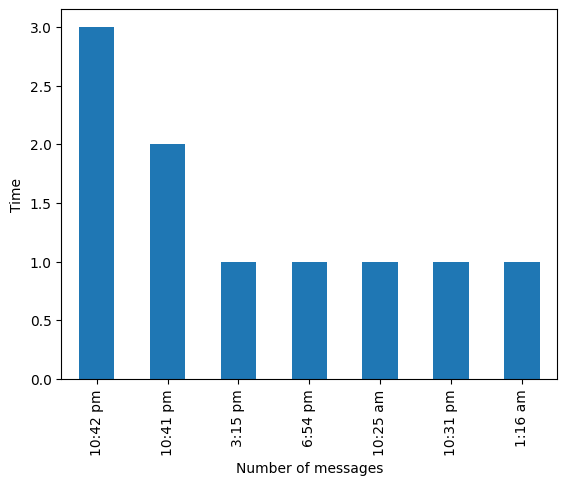

In [48]:
import matplotlib.pyplot as plt

# Plot the top 10 most frequent message times
messages_df['Time'].value_counts().head(10).plot.bar()

plt.xlabel('Number of messages')
plt.ylabel('Time')
plt.show()


There are 1252 words in all the messages.


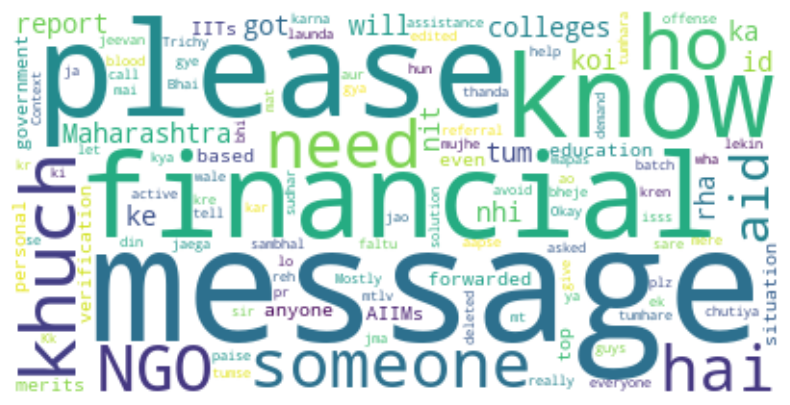

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join all messages into a single string
text = " ".join(review for review in messages_df['Message'])

# Print total number of words
print("There are {} words in all the messages.".format(len(text)))

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
